<a href="https://colab.research.google.com/github/hooroobaby/DSonCyberSecurity/blob/main/h_dynamic_111356043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Wed 19 Apr 2023 08:48:37 AM UTC


In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E&export=download' -O 272mal_newhooklog.zip

--2023-04-19 08:48:38--  https://drive.google.com/uc?id=14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E&export=download
Resolving drive.google.com (drive.google.com)... 142.251.16.139, 142.251.16.101, 142.251.16.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ulj9h9h276934flcvbrrl7q1vm531k6/1681894125000/17174434063503717705/*/14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E?e=download&uuid=055e2c60-df81-443c-95ee-c71ebd9b6a8e [following]
--2023-04-19 08:48:55--  https://doc-0c-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ulj9h9h276934flcvbrrl7q1vm531k6/1681894125000/17174434063503717705/*/14eCWgQ9etP1QOmZArvpyPJEWVgTQzg_E?e=download&uuid=055e2c60-df81-443c-95ee-c71ebd9b6a8e
Resolving doc-0c-38-docs.googleusercontent.com (doc-0c-38-docs.googleusercontent.com)... 142.251.16.132, 2607:

In [ ]:
if not os.path.exists('hooklogs'):
    !unzip -o 272mal_newhooklog.zip
else:
    print('Directory already exists, skipping unzip')

Directory already exists, skipping unzip


In [ ]:
!head -10 hooklogs/f5bf9fc6d85ea6e8501dbf78_1332.trace.hooklog

1332 malware.exe
#225140000
CreateFile
hName=C:\WINDOWS\WindowsShell.Manifest
desiredAccess=GENERIC_READ 
creationDisposition=OPEN_EXISTING
Return=SUCCESS
#225470000
RegQueryValue
hKey=HKEY_CURRENT_USER\Control Panel\Desktop\SmoothScroll


In [ ]:
import os

class Hooklog(object):
  filepathname = None
  par = None

  digitname = None
  length = None
  li = None

  # 初始化Hooklog物件，指定要解析的檔案路徑filepathname，並可以選擇是否解析參數
  def __init__(self, filepathname, par = False):
    self.filepathname = filepathname
    self.par = par
    self.li = list()
    self.length = 0

    assert filepathname != ""
    self._parseDigitName()
    self._parseHooklog()

  def __len__(self):
    return self.length #回傳行數

  def __iter__(self):
    return iter(self.li)

  def __str__(self):
    return "class Hooklog: %s, par = %s, len = %d, digit name = %s" % (self.filepathname, self.par, self.length, self.digitname)

  # 解析檔案名稱，取得其中的數字字串
  def _parseDigitName(self):
    self.digitname = self.filepathname.split('/')[-1][0:6] + '-' + self.filepathname.split('_')[-1].split('.')[0]

  # 解析Hooklog檔案，將每一行紀錄轉換成tuple型態
  def _parseHooklog(self):
    if os.path.isfile(self.filepathname):
      handle = open(self.filepathname, "rb")

      while True:
        tick, api, pars = self._getNextPair(handle)
        if tick == 0:
          break
        if self.par:
          self.li.append((tick, api, pars))
        else:
          self.li.append((tick, api))
        self.length += 1
      if handle:
        handle.close()

      self.li.sort(key = lambda tup: tup[0]) # sort by tick

    else:
      print("file not exist!")
      raise

  # 解析Hooklog檔案中的下一筆記錄（tick, api, pars
  def _getNextPair(self, handle):
    tick = 0
    api = ''
    pars = None

    while True:
      line = handle.readline().decode("windows-1252")
      if not line:
        break # eof
      if line[0] == '#': # a new call
        tick = line[1:].strip()
        api = handle.readline().decode("windows-1252").strip() # next line
        api = api[1:] if api[0] == '=' else api # remove '='

        if self.par == True:
          pars = self._getParValue(api, handle)
        break
      else:
        continue
    return tick, api, pars

  def _getParValue(self, api, handle):
    firstpar = handle.readline().decode("windows-1252").strip()
    return firstpar

  # 取得Hooklog中的API組合，可指定gram參數決定組合長度。回傳的一個set物件，其中的元素是字串，代表一個 API 組合
  def getAPISet(self, gram = 1):
    _set = set()
    for i in range(self.length - gram + 1):
      key = ''
      for g in range(gram):
        key += self.li[i+g][1] # api
      _set.add(key)
    return _set

In [ ]:
try:
  hl = Hooklog("hooklogs/f5bf9fc6d85ea6e8501dbf78_1332.trace.hooklog")
  print(hl)
except:
  print("Error")

class Hooklog: hooklogs/f5bf9fc6d85ea6e8501dbf78_1332.trace.hooklog, par = False, len = 132, digit name = f5bf9f-1332


In [ ]:
# print the first 10 calss
count = 10
for call in hl:
  print(call)
  if count <= 1:
    break
  else:
    count -= 1

('225140000', 'CreateFile')
('225470000', 'RegQueryValue')
('225490000', 'RegQueryValue')
('226940000', 'RegQueryValue')
('226940000', 'RegQueryValue')
('227480000', 'RegQueryValue')
('227930000', 'LoadLibrary')
('228150000', 'LoadLibrary')
('229520000', 'RegQueryValue')
('229560000', 'RegQueryValue')


In [ ]:
try:
  hlp = Hooklog("hooklogs/f5bf9fc6d85ea6e8501dbf78_1332.trace.hooklog", True)
  print(hlp)
except:
  print("Error")

class Hooklog: hooklogs/f5bf9fc6d85ea6e8501dbf78_1332.trace.hooklog, par = True, len = 132, digit name = f5bf9f-1332


In [ ]:
# print the first 10 calss
count = 10
for call in hlp:
  print(call)
  if count <= 1:
    break
  else:
    count -= 1

('225140000', 'CreateFile', 'hName=C:\\WINDOWS\\WindowsShell.Manifest')
('225470000', 'RegQueryValue', 'hKey=HKEY_CURRENT_USER\\Control Panel\\Desktop\\SmoothScroll')
('225490000', 'RegQueryValue', 'hKey=HKEY_CURRENT_USER\\software\\Microsoft\\Windows\\CurrentVersion\\Explorer\\Advanced\\EnableBalloonTips')
('226940000', 'RegQueryValue', 'hKey=HKEY_LOCAL_MACHINE\\SYSTEM\\CurrentControlSet\\Control\\Session Manager\\CriticalSectionTimeout')
('226940000', 'RegQueryValue', 'hKey=HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Ole\\RWLockResourceTimeOut')
('227480000', 'RegQueryValue', 'hKey=HKEY_LOCAL_MACHINE\\SYSTEM\\Setup\\SystemSetupInProgress')
('227930000', 'LoadLibrary', 'lpFileName=comctl32.dll')
('228150000', 'LoadLibrary', 'lpFileName=comctl32.dll')
('229520000', 'RegQueryValue', 'hKey=HKEY_CURRENT_USER\\Software\\Microsoft\\Windows\\CurrentVersion\\ThemeManager\\Compositing')
('229560000', 'RegQueryValue', 'hKey=HKEY_CURRENT_USER\\Control Panel\\Desktop\\LameButtonText')


In [ ]:
# directory walk
hl_list = []
sn_list = [] # short name

for dirPath, dirNames, fileNames in os.walk("hooklogs/"): #走遍hooklogs資料夾
  for fileName in fileNames:
    filenamepath = os.path.join(dirPath, fileName)
    try:
      hl = Hooklog(filenamepath)
      hl_list.append(hl)
      sn_list.append(hl.digitname) #_parseDigitName，簡短
    except:
      print("Error:", filenamepath)

In [ ]:
APISet = set()
for hl in hl_list:
  APISet = APISet.union(hl.getAPISet(gram = 1)) #取得API，長度為1的set
APISet_li = list(APISet)

##### 共有14個API(0-13)

In [ ]:
APIDict = {i:api for i,api in list(enumerate(APISet_li))}
APIDict.update( {api:i for i,api in list(enumerate(APISet_li))} )
APIDict

{0: 'CreateFile',
 1: 'RegCreateKey',
 2: 'OpenProcess',
 3: 'CreateProcess',
 4: 'DeleteFile',
 5: 'RegSetValue',
 6: 'CreateProcessInternal',
 7: 'LoadLibrary',
 8: 'ExitProcess',
 9: 'RegEnumValue',
 10: 'CopyFile',
 11: 'L',
 12: 'RegQueryValue',
 13: 'RegDeleteKey',
 'CreateFile': 0,
 'RegCreateKey': 1,
 'OpenProcess': 2,
 'CreateProcess': 3,
 'DeleteFile': 4,
 'RegSetValue': 5,
 'CreateProcessInternal': 6,
 'LoadLibrary': 7,
 'ExitProcess': 8,
 'RegEnumValue': 9,
 'CopyFile': 10,
 'L': 11,
 'RegQueryValue': 12,
 'RegDeleteKey': 13}

In [ ]:
onehot_hl_li = []

for hl in hl_list:
  onehot_api_li = [0]*14
  for t, api in hl:
    onehot_api_li[APIDict[api]] = 1
  onehot_hl_li.append(onehot_api_li)

print(len(onehot_hl_li))

419


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(onehot_hl_li, columns=APISet_li, index=sn_list)
df

,CreateFile,RegCreateKey,OpenProcess,CreateProcess,DeleteFile,RegSetValue,CreateProcessInternal,LoadLibrary,ExitProcess,RegEnumValue,CopyFile,L,RegQueryValue,RegDeleteKey
516580-748,1,1,0,1,0,1,1,1,0,1,0,0,1,0
5032e7-1412,1,1,0,0,1,0,0,1,0,0,0,0,1,0
f6d62c-1448,0,0,0,0,0,0,1,1,0,0,0,0,1,0
17d85f-1432,1,1,0,0,1,0,0,1,0,0,0,0,1,0
61fd4c-1276,1,1,1,0,1,1,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32a20d-1304,0,0,0,0,0,0,0,0,0,0,0,0,1,0
20f246-1468,1,1,0,0,0,1,0,1,0,1,0,0,1,1
51fc85-1476,1,1,0,0,1,1,0,1,0,1,0,0,1,1
b104b8-1248,1,0,0,1,0,0,1,1,0,0,0,0,1,0


##### 可以看出在這些惡意hooklog中，不同API被使用的次數

In [ ]:
df.sum()

CreateFile               402
RegCreateKey             322
OpenProcess               60
CreateProcess            127
DeleteFile               122
RegSetValue              222
CreateProcessInternal    140
LoadLibrary              406
ExitProcess              105
RegEnumValue             160
CopyFile                  23
L                          1
RegQueryValue            415
RegDeleteKey             136
dtype: int64

### (UPGMA)  input: one-hot encoding的hooklog

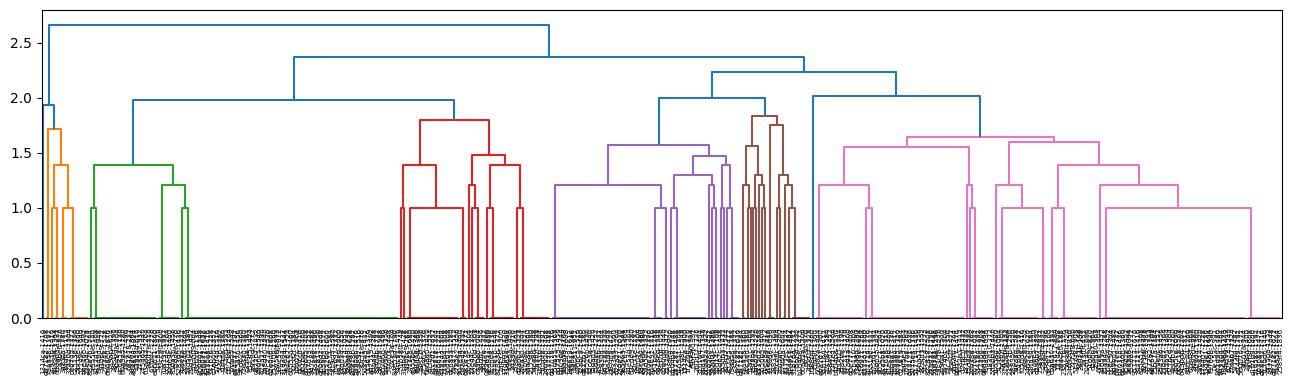

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(16,4))

X = np.array(onehot_hl_li)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

##### input: PCA降維後
二維 explained variance ratio: [0.35290373 0.24362791] 已可解釋超過5成

explained variance ratio: [0.35290373 0.24362791]


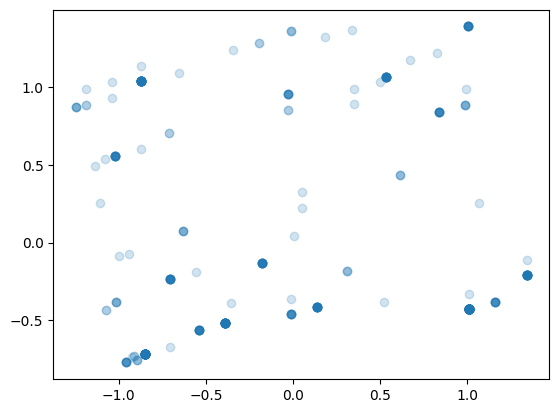

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array(onehot_hl_li)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2)
plt.show()

#### 降維後距離變小

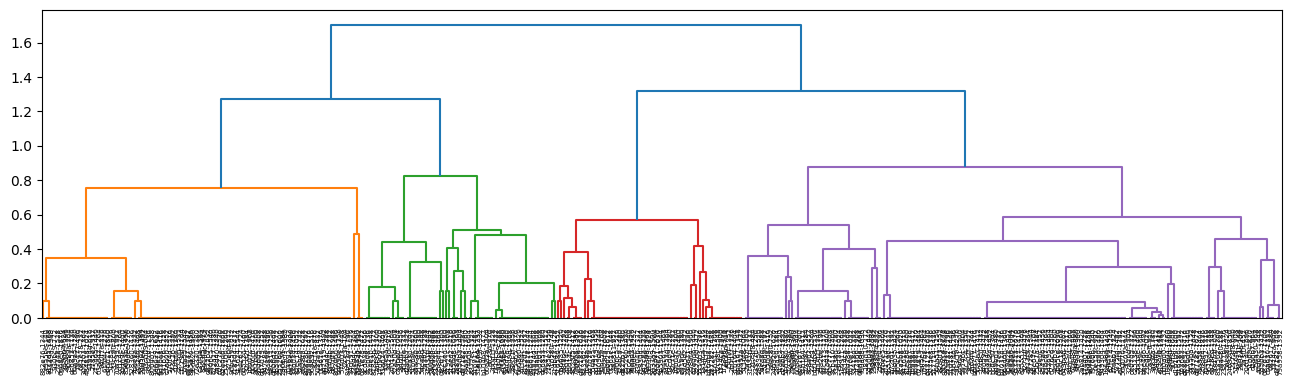

In [ ]:
plt.figure(figsize=(16,4))

Z = sch.linkage(X_r, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

### 用Jaccard計算樣本之間的距離
類別變少了，猜測是因為用的是1d matrix

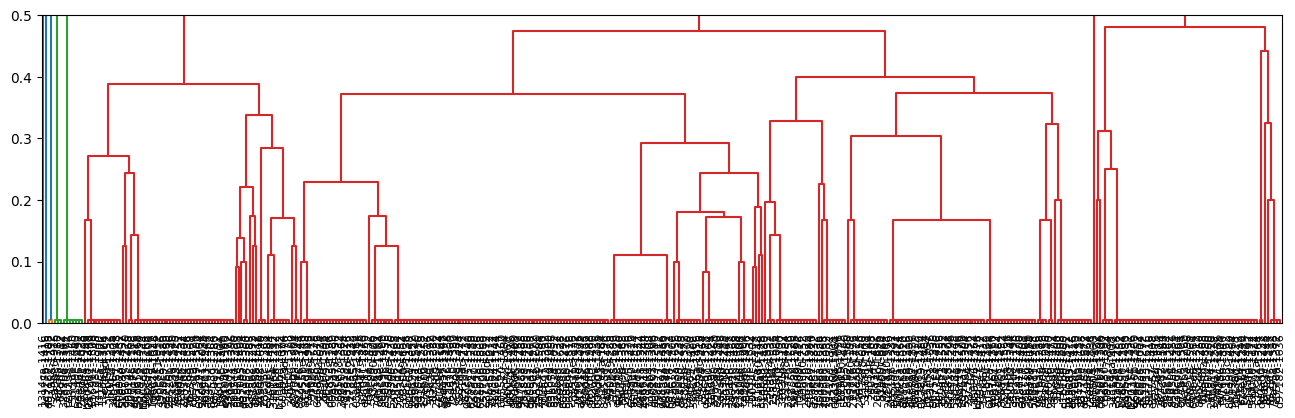

In [ ]:
import scipy
import sklearn.metrics as sm

plt.figure(figsize=(16,4))

X = np.array(onehot_hl_li)

# the double loop can be improved, how?
matrix = list()
for i in sn_list:
  li = list()
  for j in sn_list:
    i_ser = df.loc[i]
    j_ser = df.loc[j]

    _inter_ser = i_ser & j_ser
    _union_ser = i_ser | j_ser

    if sum(_union_ser) > 0:
      jaccard = round(sum(_inter_ser)/sum(_union_ser), 4)
      li.append(1.0 - jaccard)
    else:
      li.append(0.0)

  matrix.append(li)
# end of create distance matrix

D = scipy.spatial.distance.squareform(matrix)
Z = sch.linkage(D, method = 'weighted') # X is a 1d condensed distance matrix.
# hack Z
Z = [[z[0], z[1], 0.005 if z[2]==0 else z[2], z[3]] for z in Z]
# end of hack Z
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=8)
plt.ylim(0.0, 0.5)
plt.show()

### 用frequency做

In [ ]:
frequency_hl_li = []

for hl in hl_list:
  frequency_api_li = [0]*14
  for t, api in hl:
    frequency_api_li[APIDict[api]] += 1 # 計算出現頻率
  frequency_hl_li.append(frequency_api_li)

print(len(frequency_hl_li))

419


In [ ]:
df_frequency = pd.DataFrame(frequency_hl_li, columns=APISet_li, index=sn_list)
df_frequency

,CreateFile,RegCreateKey,OpenProcess,CreateProcess,DeleteFile,RegSetValue,CreateProcessInternal,LoadLibrary,ExitProcess,RegEnumValue,CopyFile,L,RegQueryValue,RegDeleteKey
516580-748,16,19,0,2,0,15,2,19,0,1,0,0,261,0
5032e7-1412,21,1,0,0,1,0,0,21,0,0,0,0,28,0
f6d62c-1448,0,0,0,0,0,0,1,4,0,0,0,0,1,0
17d85f-1432,21,1,0,0,1,0,0,21,0,0,0,0,28,0
61fd4c-1276,77,40,16,0,14,33,0,100,0,108,0,0,796,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32a20d-1304,0,0,0,0,0,0,0,0,0,0,0,0,3,0
20f246-1468,21,25,0,0,0,25,0,40,0,88,0,0,342,3
51fc85-1476,25,25,0,0,4,25,0,41,0,88,0,0,362,3
b104b8-1248,2,0,0,1,0,0,2,2,0,0,0,0,1,0


#### 變得比one-hot類別更少了，且距離也變大了，可能是特徵變得很稀疏

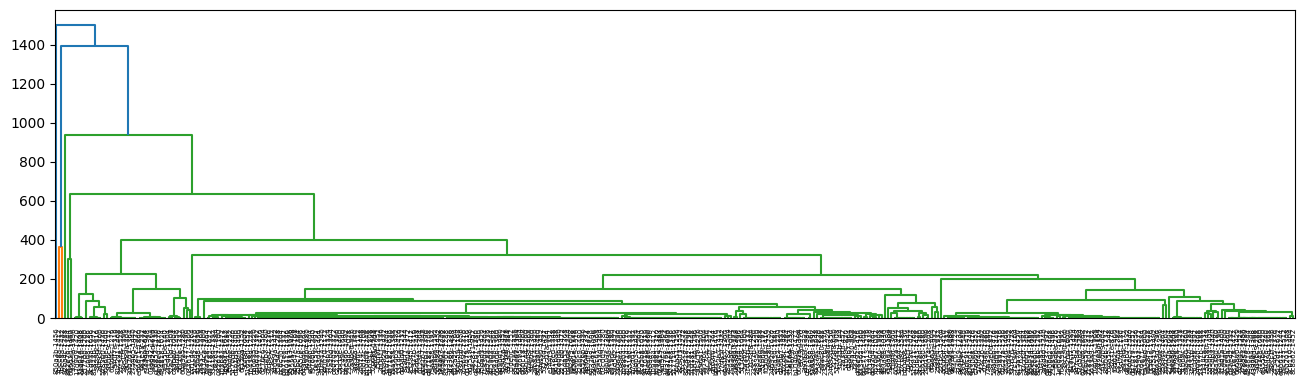

In [ ]:
plt.figure(figsize=(16,4))

X = np.array(frequency_hl_li)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

explained variance ratio: [0.86568075 0.05881704]


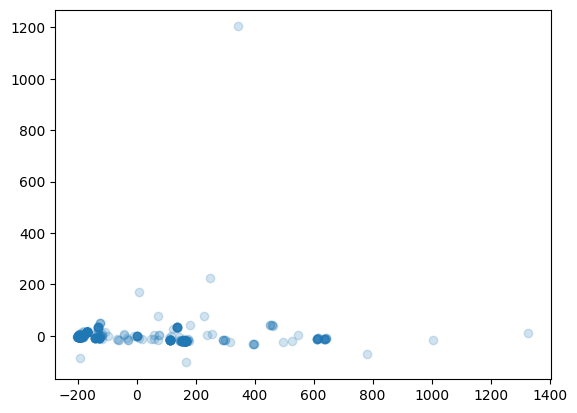

In [ ]:
X = np.array(frequency_hl_li)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2)
plt.show()

### 降維後結果有比剛剛好

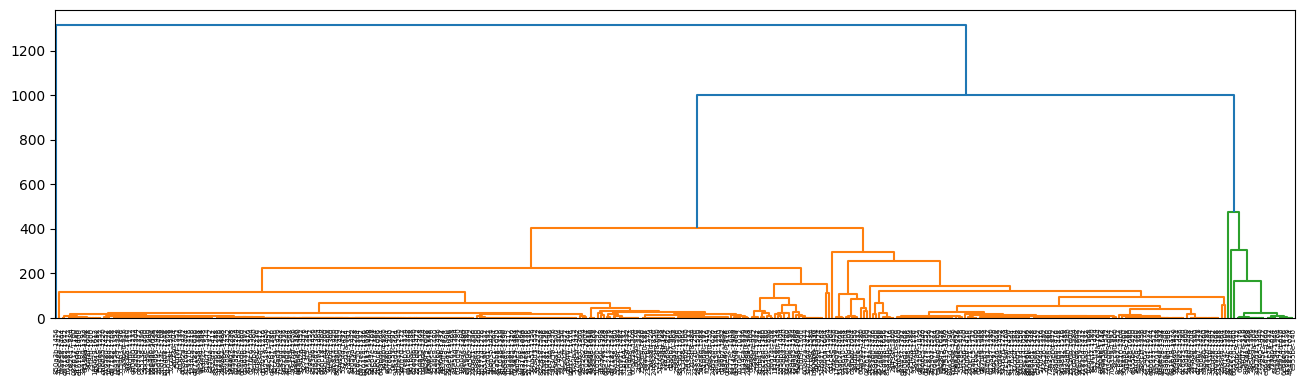

In [ ]:
plt.figure(figsize=(16,4))

Z = sch.linkage(X_r, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

### DotMatrix
##### 可以看出很對稱，這可能表示apiX出現時，經常會跟apiY一起用

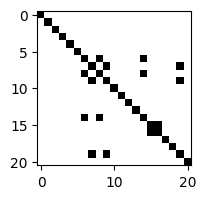

In [ ]:
def createDotMatrix(hl):
  n = len(hl) # API調用紀錄

  x = hl.li
  y = hl.li

  matched = [[0 for j in range(n)] for i in range(n)]
  for i, t_api_x in enumerate(x):
    for j, t_api_y in enumerate(y):
      if hl.par == True:
        api_x = t_api_x[1] + t_api_x[2]
        api_y = t_api_y[1] + t_api_y[2]
      else:
        api_x = t_api_x[1]
        api_y = t_api_y[1]
      if api_x == api_y:
        matched[j][i] = 1.0

  return matched

par_hl = Hooklog("hooklogs/e919dc6f8095a3b462524597_1380.trace.hooklog", True)
matched = createDotMatrix(par_hl)

plt.figure(figsize=(2, 2))
plt.imshow(matched, cmap='Greys')
plt.show()

### 2*n
##### 因為發現API之間同時出現的可能性，所以在做一個2*n的Dict，一次放兩個API，看出現的機率, one-hot

In [ ]:
APISet = []
for i in list(APISet_li):
  for j in list(APISet_li):
    APISet.append([i,j])
APISet

[['CreateFile', 'CreateFile'],
 ['CreateFile', 'RegCreateKey'],
 ['CreateFile', 'OpenProcess'],
 ['CreateFile', 'CreateProcess'],
 ['CreateFile', 'DeleteFile'],
 ['CreateFile', 'RegSetValue'],
 ['CreateFile', 'CreateProcessInternal'],
 ['CreateFile', 'LoadLibrary'],
 ['CreateFile', 'ExitProcess'],
 ['CreateFile', 'RegEnumValue'],
 ['CreateFile', 'CopyFile'],
 ['CreateFile', 'L'],
 ['CreateFile', 'RegQueryValue'],
 ['CreateFile', 'RegDeleteKey'],
 ['RegCreateKey', 'CreateFile'],
 ['RegCreateKey', 'RegCreateKey'],
 ['RegCreateKey', 'OpenProcess'],
 ['RegCreateKey', 'CreateProcess'],
 ['RegCreateKey', 'DeleteFile'],
 ['RegCreateKey', 'RegSetValue'],
 ['RegCreateKey', 'CreateProcessInternal'],
 ['RegCreateKey', 'LoadLibrary'],
 ['RegCreateKey', 'ExitProcess'],
 ['RegCreateKey', 'RegEnumValue'],
 ['RegCreateKey', 'CopyFile'],
 ['RegCreateKey', 'L'],
 ['RegCreateKey', 'RegQueryValue'],
 ['RegCreateKey', 'RegDeleteKey'],
 ['OpenProcess', 'CreateFile'],
 ['OpenProcess', 'RegCreateKey'],
 ['Ope

In [ ]:
len(APISet)

196

In [ ]:
onehot_hl_li_2n = []
frequency_hl_li_2n = []


for hl in hl_list:
  onehot_api_li_2n = [0]*196
  frequency_api_li_2n = [0]*196
  start = 1
  for t, api in hl:
    if start ==1:
      thisAPIname = api
      start=0
      continue
    onehot_api_li_2n[APISet.index([thisAPIname, api])] = 1
    frequency_api_li_2n[APISet.index([thisAPIname, api])] +=1
    thisAPIname = api
    start=0
  onehot_hl_li_2n.append(onehot_api_li_2n)
  frequency_hl_li_2n.append(frequency_api_li_2n)


print(len(onehot_hl_li_2n))
print(len(frequency_hl_li_2n))

419
419


In [ ]:
df2n = pd.DataFrame(onehot_hl_li_2n, index=sn_list)
df2n

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
516580-748,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5032e7-1412,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
f6d62c-1448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17d85f-1432,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61fd4c-1276,1,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32a20d-1304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20f246-1468,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
51fc85-1476,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
b104b8-1248,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 我們就可以知道項index191 ['RegDeleteKey', 'RegEnumValue']組合就不太會一起出現

In [ ]:
df2n.sum()

0      278
1      137
2       36
3        0
4      109
      ... 
191      0
192      0
193      0
194     34
195    134
Length: 196, dtype: int64

In [ ]:
APISet[191]

['RegDeleteKey', 'RegEnumValue']

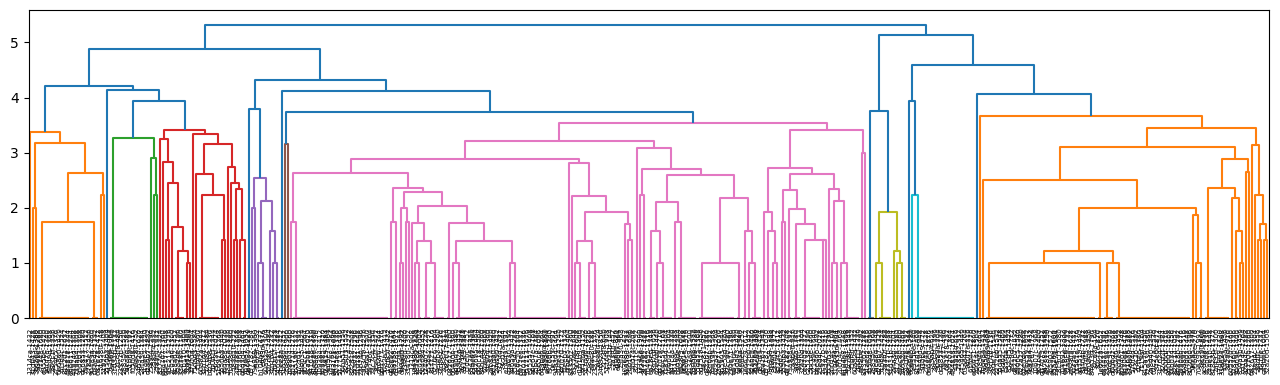

In [ ]:
plt.figure(figsize=(16,4))

X = np.array(onehot_hl_li_2n)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

跟只做14個的onehot比，類別變多，且距離變大了

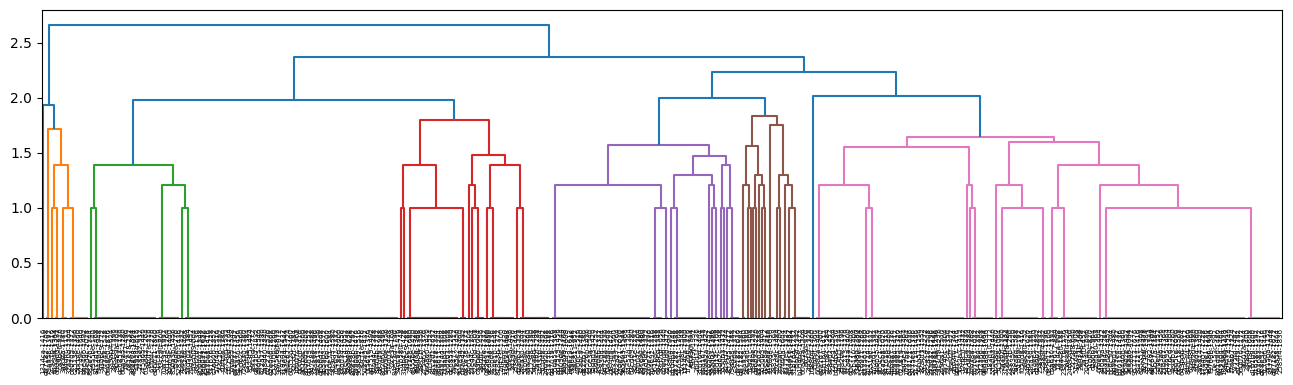

In [ ]:
df2nf = pd.DataFrame(frequency_hl_li_2n, index=sn_list)
df2nf

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
516580-748,6,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5032e7-1412,11,0,0,0,1,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
f6d62c-1448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17d85f-1432,11,0,0,0,1,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
61fd4c-1276,48,2,0,0,6,0,0,3,0,2,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32a20d-1304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20f246-1468,13,0,0,0,0,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,2
51fc85-1476,16,0,0,0,0,0,0,3,0,2,...,0,0,0,0,0,0,0,0,0,2
b104b8-1248,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('最多次被一起叫次數', max(df2nf.sum()), "在", np.argmax(df2nf.sum()))
print( "確認: df2nf[180].sum()=", df2nf[180].sum())

最多次被一起叫次數 69976 在 180
確認: df2nf[180].sum()= 69976


In [ ]:
APISet[np.argmax(df2nf.sum())]

['RegQueryValue', 'RegQueryValue']

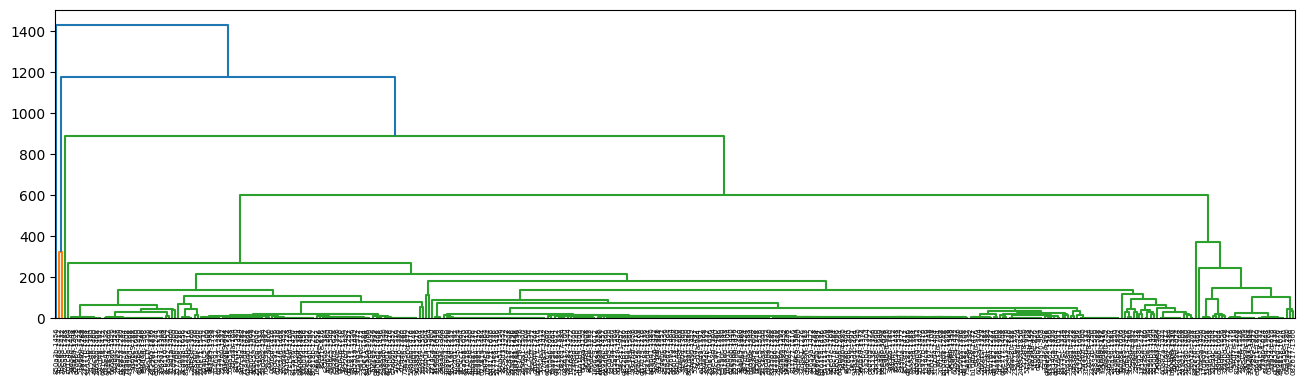

In [ ]:
plt.figure(figsize=(16,4))

X = np.array(frequency_hl_li_2n)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

2gram的狀況跟1gram時一樣，用頻率效果不會比onehot好